<a href="https://colab.research.google.com/github/e-margot/Detection_plates_and_OCR/blob/main/detection_plates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div align="center">

  <a href="https://ultralytics.com/yolov5" target="_blank">
    <img width="1024", src="https://github.com/ultralytics/assets/raw/master/yolov5/v62/splash_notebook.png"></a>


<br>
  <a href="https://bit.ly/yolov5-paperspace-notebook"><img src="https://assets.paperspace.io/img/gradient-badge.svg" alt="Run on Gradient"></a>
  <a href="https://colab.research.google.com/github/ultralytics/yolov5/blob/master/tutorial.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"></a>
  <a href="https://www.kaggle.com/ultralytics/yolov5"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" alt="Open In Kaggle"></a>
<br>

This <a href="https://github.com/ultralytics/yolov5">YOLOv5</a> 🚀 notebook by <a href="https://ultralytics.com">Ultralytics</a> presents simple train, validate and predict examples to help start your AI adventure.<br>See <a href="https://github.com/ultralytics/yolov5/issues/new/choose">GitHub</a> for community support or <a href="https://ultralytics.com/contact">contact us</a> for professional support.

</div>

# Setup

Clone GitHub [repository](https://github.com/ultralytics/yolov5), install [dependencies](https://github.com/ultralytics/yolov5/blob/master/requirements.txt) and check PyTorch and GPU.

In [1]:
import cv2
import numpy as np
import imutils
import pytesseract
from matplotlib import pyplot as plt

In [2]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v6.2-189-g2f1eb21 Python-3.7.14 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.5/78.2 GB disk)


In [3]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="h4khND8aLa7oGwuFIjmj")
project = rf.workspace("plate-tsusp").project("russian-plate")
dataset = project.version(1).download("yolov5")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to Russian-plate-1 in yolov5pytorch:: 100%|██████████| 1050/1050 [00:00<00:00, 1560.69it/s]


In [4]:
!cp "../yolov5/Russian-plate-1/data.yaml" "../yolov5/data"

# Train


In [4]:
# Train YOLOv5s on COCO128 for 3 epochs
!python train.py --img 640 --batch 4 --epochs 20 --data data.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=20, batch_size=4, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.2-189-g2f1eb21 Python-3.7.14 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degr

# Detect

`detect.py` runs YOLOv5 inference on a variety of sources, downloading models automatically from the [latest YOLOv5 release](https://github.com/ultralytics/yolov5/releases), and saving results to `runs/detect`. Example inference sources are:

```shell
python detect.py --source 0  # webcam
                          img.jpg  # image 
                          vid.mp4  # video
                          screen  # screenshot
                          path/  # directory
                          'path/*.jpg'  # glob
                          'https://youtu.be/Zgi9g1ksQHc'  # YouTube
                          'rtsp://example.com/media.mp4'  # RTSP, RTMP, HTTP stream
```

In [5]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 640 --save-crop --conf 0.25 --source /content/yolov5/Russian-plate-1/test/images/11_6_2014_18_42_28_170_png.rf.d06e32c788c36f9527827ea90ad53072.jpg

detect: weights=['runs/train/exp/weights/best.pt'], source=/content/yolov5/Russian-plate-1/test/images/11_6_2014_18_42_28_170_png.rf.d06e32c788c36f9527827ea90ad53072.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=True, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v6.2-189-g2f1eb21 Python-3.7.14 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
tensor([[ 72.00000, 217.00000, 138.00000, 249.00000,   0.77033,   0.00000]], device='cuda:0')
image 1/1 /content/yolov5/Russian-plate-1/test/images/11_6_2014_18_42_28_170_png.rf.d06e32c788c36f9527827ea90ad53072.jpg: 640x640 1 0, 12.7ms
Speed: 0.5ms pre-pro

In [ ]:
# !python detect.py --weights runs/train/exp/weights/best.pt --img 640 --save-crop --conf 0.25 --source 'https://www.youtube.com/watch?v=BHJxIwvFIGY'

In [6]:
!sudo apt install tesseract-ocr
!pip install pytesseract 
!mkdir tessdata
!wget -O ./tessdata/rus.traineddata https://github.com/tesseract-ocr/tessdata/blob/main/rus.traineddata?raw=true

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 12 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
mkdir: cannot create directory ‘tessdata’: File exists
--2022-10-11 01:15:51--  https://github.com/tesseract-ocr/tessdata/blob/main/rus.traineddata?raw=true
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/tesseract-ocr/tessdata/raw/main/rus.traineddata [following]
--2022-10-11 01:15:52--  https://github.com/tesseract-ocr/tessdata/raw/main/rus.traineddata
Reusing existing c

In [7]:
config_tesseract = "--tessdata-dir tessdata --psm 6"

In [9]:
!sudo apt-get install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 12 not upgraded.


In [ ]:
!pip install pytesseract==0.3.9

In [8]:
im = cv2.imread('/content/yolov5/runs/detect/exp12/crops/0/watch_v_BHJxIwvFIGY1011.jpg')
plate = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

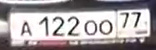

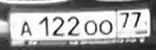

In [20]:
from google.colab.patches import cv2_imshow
cv2_imshow(im)
cv2_imshow(plate)

In [10]:
text = pytesseract.image_to_string(plate, lang="rus", config=config_tesseract)
print(text)

: д12299_77_|

